# Logistic Regression

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [110]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

Currenty the features have different scales. In the current setting age and sodium to potassium ratio have a far greater influence as their values are much larger. I will use *StandardScaler* to perform a standardization.

In [111]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

Next the logistic regression is trained.

In [123]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

Make prediction.

In [113]:
predictions = lr.predict(X_test)

Now the performance is evaluated.

The accuracy is at 0.7, this is far higher than the baseline model. All of drugs Y were correctly classified (recall = 1), of the classified drugs Y 90% were correct (precision = 0.9). The model managed to perform well classifying drug X: 82% of these were correctly classified. However out of the classifications only 56% were correct. The values are even lower for drug C. Drugs A and B were never predicted.

In [126]:
c = classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.00      0.00      0.00         3
           C       0.50      0.33      0.40         3
           X       0.56      0.82      0.67        11
           Y       0.90      1.00      0.95        18

    accuracy                           0.70        40
   macro avg       0.39      0.43      0.40        40
weighted avg       0.60      0.70      0.64        40



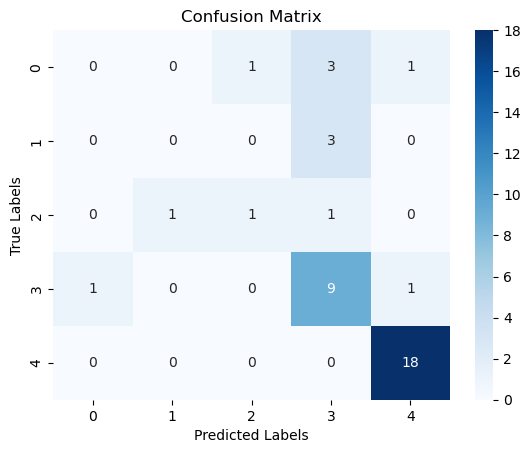

In [129]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()